In [59]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import math
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

In [60]:
#Função de Rastrigin:
def rastrigin(x, A=10):
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

In [61]:
#Algoritmo Genético com Cromossomos Binários:
def criar_populacao_binaria(tamanho_populacao, tamanho_cromossomo):
    return np.random.randint(2, size=(tamanho_populacao, tamanho_cromossomo))

def avaliar_aptidao_binaria(populacao, A=10):
    aptidao = np.array([rastrigin(decode_binario(cromossomo), A) for cromossomo in populacao])
    return aptidao + 1  # Função de aptidão Ψ(x) = f(x) + 1

def decode_binario(cromossomo):
    return -10 + (cromossomo * (20 / cromossomo.size)).astype(float)

def selecao_roleta(aptidao):
    prob = aptidao / np.sum(aptidao)
    return np.random.choice(len(aptidao), size=len(aptidao), p=prob)

def cruzamento_binario(pai1, pai2):
    ponto_cruzamento = np.random.randint(0, len(pai1))
    filho1 = np.concatenate([pai1[:ponto_cruzamento], pai2[ponto_cruzamento:]])
    filho2 = np.concatenate([pai2[:ponto_cruzamento], pai1[ponto_cruzamento:]])
    return filho1, filho2

def mutacao_binaria(cromossomo, taxa_mutacao=0.01):
    mutacoes = np.random.rand(len(cromossomo)) < taxa_mutacao
    cromossomo[mutacoes] = 1 - cromossomo[mutacoes]
    return cromossomo

def algoritmo_genetico_binario(tamanho_populacao=100, tamanho_cromossomo=20, n_geracoes=100, taxa_recomb=0.85, crit_convergencia=50):
    populacao = criar_populacao_binaria(tamanho_populacao, tamanho_cromossomo)
    melhor_aptidao = np.inf
    historico_aptidao = []
    contador_estagnacao = 0

    for _ in range(n_geracoes):
        aptidao = avaliar_aptidao_binaria(populacao)
        melhor_aptidao_atual = np.min(aptidao)
        
        if melhor_aptidao_atual < melhor_aptidao:
            melhor_aptidao = melhor_aptidao_atual
            contador_estagnacao = 0  # Reset se melhorou
        else:
            contador_estagnacao += 1

        # Critério de convergência
        if contador_estagnacao >= crit_convergencia:
            print(f"Convergência atingida na geração {_}")
            break

        historico_aptidao.append(melhor_aptidao)
        selecao = selecao_roleta(aptidao)
        nova_populacao = []

        for i in range(0, tamanho_populacao, 2):
            pai1, pai2 = populacao[selecao[i]], populacao[selecao[i+1]]
            if np.random.rand() < taxa_recomb:
                filho1, filho2 = cruzamento_binario(pai1, pai2)
            else:
                filho1, filho2 = pai1, pai2
            nova_populacao.append(mutacao_binaria(filho1))
            nova_populacao.append(mutacao_binaria(filho2))
        
        populacao = np.array(nova_populacao)

    return historico_aptidao


In [62]:
#Algoritmo Genético com Representação em Ponto Flutuante
def criar_populacao_float(tamanho_populacao, tamanho_cromossomo):
    return np.random.uniform(-10, 10, size=(tamanho_populacao, tamanho_cromossomo))

def avaliar_aptidao_float(populacao, A=10):
    aptidao = np.array([rastrigin(cromossomo, A) for cromossomo in populacao])
    return aptidao + 1  # Função de aptidão Ψ(x) = f(x) + 1

def selecao_torneio(populacao, aptidao, tamanho_torneio=3):
    selecao = []
    for _ in range(len(populacao)):
        torneio = np.random.choice(len(populacao), tamanho_torneio)
        vencedor = torneio[np.argmin(aptidao[torneio])]
        selecao.append(vencedor)
    return selecao

def cruzamento_sbx(pai1, pai2, eta=15):
    u = np.random.rand(len(pai1))
    beta = np.where(u <= 0.5, (2 * u)**(1 / (eta + 1)), (2 * (1 - u))**(-1 / (eta + 1)))
    filho1 = 0.5 * ((1 + beta) * pai1 + (1 - beta) * pai2)
    filho2 = 0.5 * ((1 - beta) * pai1 + (1 + beta) * pai2)
    return filho1, filho2

def mutacao_gaussiana(cromossomo, taxa_mutacao=0.01, sigma=0.1):
    mutation_mask = np.random.rand(len(cromossomo)) < taxa_mutacao
    cromossomo[mutation_mask] += np.random.normal(0, sigma, size=np.sum(mutation_mask))
    return cromossomo

def algoritmo_genetico_float(tamanho_populacao=10, tamanho_cromossomo=20, n_geracoes=100, taxa_recomb=0.85, crit_convergencia=50):
    populacao = criar_populacao_float(tamanho_populacao, tamanho_cromossomo)
    melhor_aptidao = np.inf
    historico_aptidao = []
    contador_estagnacao = 0

    for _ in range(n_geracoes):
        aptidao = avaliar_aptidao_float(populacao)
        melhor_aptidao_atual = np.min(aptidao)
        
        if melhor_aptidao_atual < melhor_aptidao:
            melhor_aptidao = melhor_aptidao_atual
            contador_estagnacao = 0  # Reset se melhorou
        else:
            contador_estagnacao += 1

        # Critério de convergência
        if contador_estagnacao >= crit_convergencia:
            print(f"Convergência atingida na geração {_}")
            break

        historico_aptidao.append(melhor_aptidao)
        selecao = selecao_torneio(populacao, aptidao)
        nova_populacao = []

        for i in range(0, tamanho_populacao, 2):
            pai1, pai2 = populacao[selecao[i]], populacao[selecao[i+1]]
            if np.random.rand() < taxa_recomb:
                filho1, filho2 = cruzamento_sbx(pai1, pai2)
            else:
                filho1, filho2 = pai1, pai2
            nova_populacao.append(mutacao_gaussiana(filho1))
            nova_populacao.append(mutacao_gaussiana(filho2))
        
        populacao = np.array(nova_populacao)

    return historico_aptidao


In [63]:
from tqdm import tqdm

def executar_algoritmos_com_dados():
    n_geracoes = 10
    n_rodadas = 100
    resultados_binario = []
    resultados_float = []
    historico_binario = []
    historico_float = []

    for _ in tqdm(range(n_rodadas)):
        aptidao_binario = algoritmo_genetico_binario(n_geracoes=n_geracoes)
        historico_binario.append(aptidao_binario)
        aptidao_float = algoritmo_genetico_float(n_geracoes=n_geracoes)
        historico_float.append(aptidao_float)

    return np.array(historico_binario), np.array(historico_float)



In [64]:
def plotar_resultados(historico_binario, historico_float):
    plt.figure(figsize=(14, 6))

    # Plotando a evolução da aptidão para o algoritmo binário
    plt.subplot(1, 2, 1)
    plt.plot(np.mean(historico_binario, axis=0), label='Algoritmo Binário')
    plt.title('Evolução da Aptidão (Binário)')
    plt.xlabel('Gerações')
    plt.ylabel('Aptidão')
    plt.legend()

    # Plotando a evolução da aptidão para o algoritmo flutuante
    plt.subplot(1, 2, 2)
    plt.plot(np.mean(historico_float, axis=0), label='Algoritmo Flutuante')
    plt.title('Evolução da Aptidão (Flutuante)')
    plt.xlabel('Gerações')
    plt.ylabel('Aptidão')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [65]:
def gerar_estatisticas(resultados):
    return {
        'menor_aptidao': np.min(resultados),
        'maior_aptidao': np.max(resultados),
        'media_aptidao': np.mean(resultados),
        'desvio_padrao': np.std(resultados)
    }

# Gerar tabela de comparação:
historico_binario, historico_float = executar_algoritmos_com_dados()
estatisticas_binario = gerar_estatisticas(historico_binario)
estatisticas_float = gerar_estatisticas(historico_float)

100%|██████████| 100/100 [00:03<00:00, 31.44it/s]


In [66]:
df = pd.DataFrame([estatisticas_binario, estatisticas_float], index=['Binário', 'Flutuante'])
print(df)

           menor_aptidao  maior_aptidao  media_aptidao  desvio_padrao
Binário      1659.000000    1754.000000    1693.884000      16.706003
Flutuante     410.760073     811.035384     619.515315      71.914842


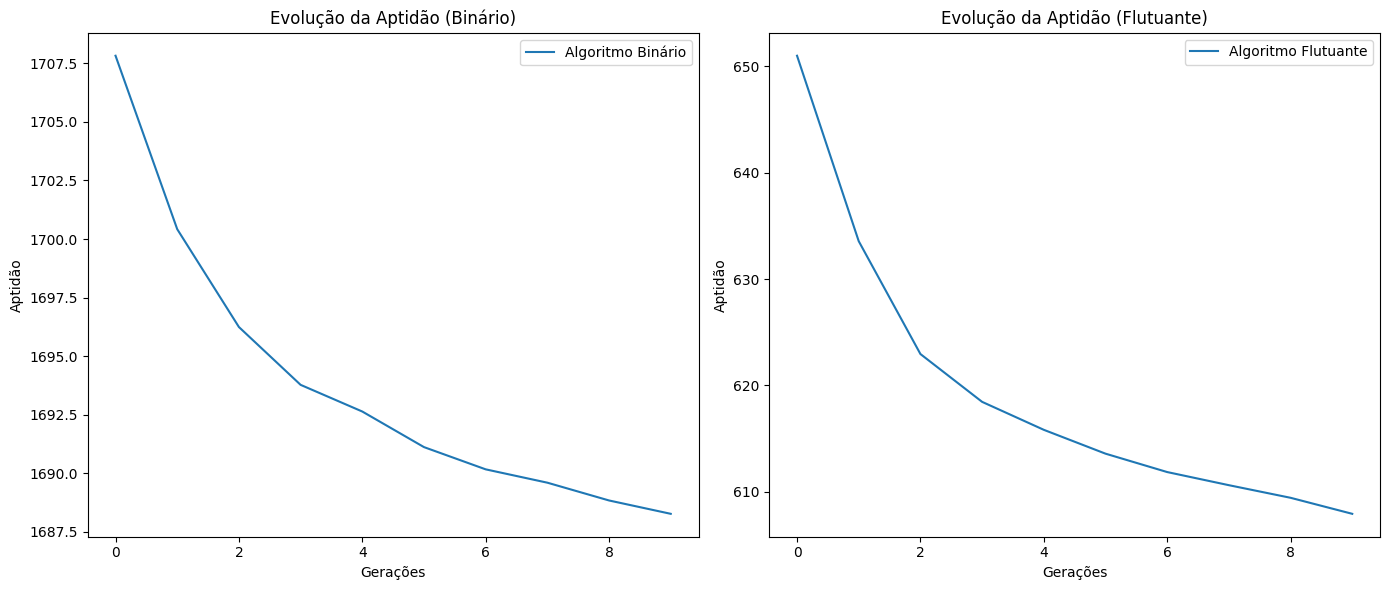

In [67]:
plotar_resultados(historico_binario, historico_float)